### Writing and testing Perceptrong model

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

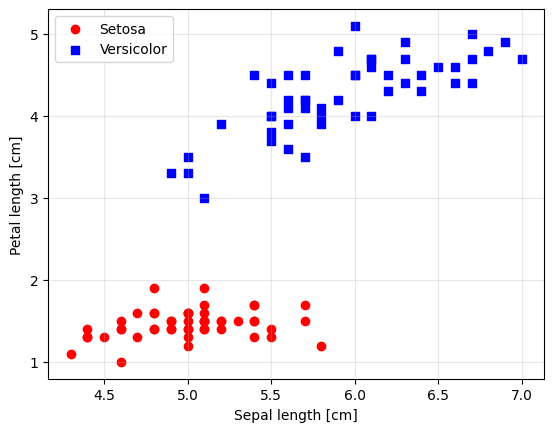

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "Setosa")
plt.scatter(X[50:, 0], X[50:, 1], color = "blue", marker = "s", label = "Versicolor")
plt.grid(alpha = 0.3)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

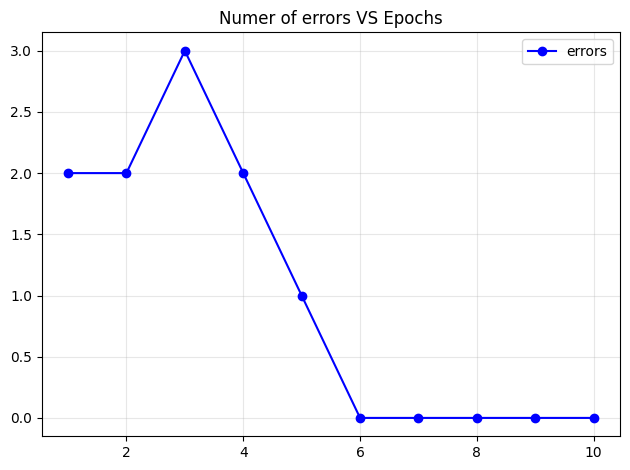

In [3]:
from perceptron import Perceptron

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.resid_) + 1), ppn.resid_, label = "errors", color = "blue", marker = "o")
plt.title("Numer of errors VS Epochs")
plt.grid(alpha = 0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

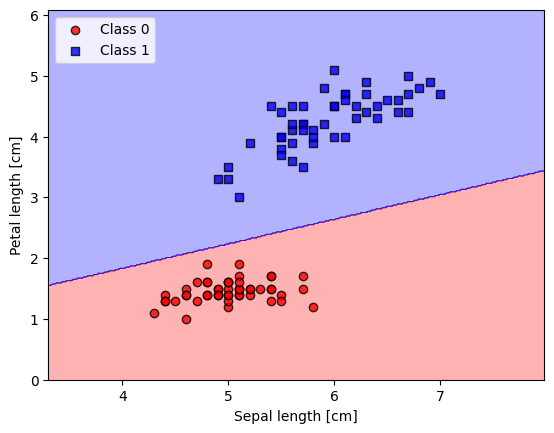

In [5]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Writing and testin Adaline model

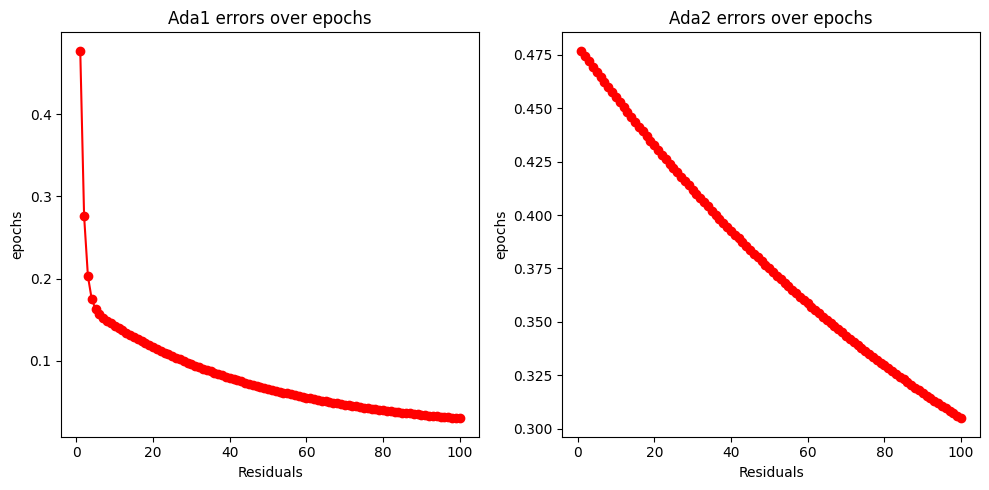

In [ ]:
from adalinegd import AdalineGD

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

eta = [0.01, 0.0001]

ada1 = AdalineGD(eta = eta[0], n_iter = 100)
ada1.fit(X, y)

ada2 = AdalineGD(eta = eta[1], n_iter = 100)
ada2.fit(X, y)

ax[0].plot(
    range(1, len(ada1.resid_) + 1),
    ada1.resid_,
    marker = "o", 
    label = f"Ada1, eta = {ada1.eta}",
    color = "r"
    )
ax[0].set_title("Ada1 errors over epochs")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("Residuals")

ax[1].plot(
    range(1, len(ada2.resid_) + 1),
    ada2.resid_,
    marker = "o", 
    label = f"Ada2, eta = {ada2.eta}",
    color = "r"
    )
ax[1].set_title("Ada2 errors over epochs")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()